# My first ML project

Thy is my first try to make a ML of the iris dataset, so let's load it first.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
iris=datasets.load_iris()

print("targets: "+str(iris.target_names))
print("features: "+str(iris.feature_names))
print("TF Version: ", tf.__version__)
print("GPU available: ", tf.test.is_gpu_available())

targets: ['setosa' 'versicolor' 'virginica']
features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
TF Version:  1.3.0
GPU available:  False


Now that the data is loaded, let's print some charts.

data[:,i] means that we're using all data 

check out the users guide of matplotlib: https://matplotlib.org/users/index.html

0


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


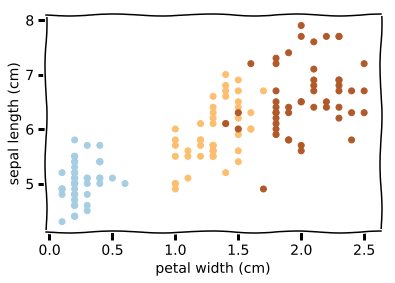

1


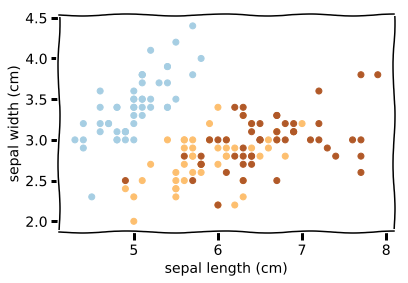

2


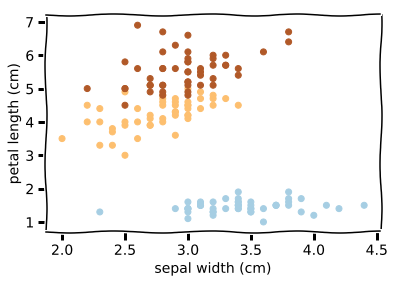

3


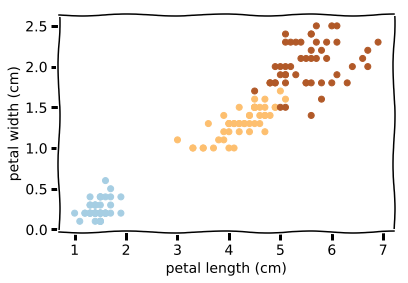

In [2]:
import matplotlib.font_manager
matplotlib.font_manager._rebuild()
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

for i in range(4):
    print(i)
    with plt.xkcd():
        plt.scatter(iris.data[:,i-1],iris.data[:,i],c=iris.target, cmap=plt.cm.Paired)
        plt.xlabel(iris.feature_names[i-1])
        plt.ylabel(iris.feature_names[i])
        #plt.legend()
        plt.show()

Let's define the activation function

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


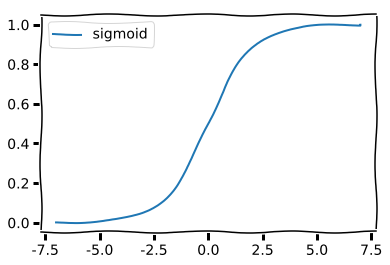

In [3]:
import numpy as np
def sigmoid(a):
        return 1/(1+np.exp(-a))

x = np.linspace(-7, 7, 1000)

#plt.subplots()
with plt.xkcd():
    plt.plot(x,sigmoid(x), label="sigmoid")
    plt.legend()
    plt.show()

now, we're multiplying the leaf sizes (features) with a static multiplication matrix

In [4]:
import numpy as np
mult_matrix = np.array([[-0.2,0.2],[-1.0,1.0]])
bias=np.array([0.1,-0.1])

for features in iris.data:
    our_feature =[features[2]-3,features[2]-2]
    
    a=np.matmul(our_feature,mult_matrix)
    #print("activations before: "+str(a))
    a=a+bias #bias must be added before the sigmoid function is called
    a=sigmoid(a)
    print("activations : "+str(a))



activations : [ 0.7349726  0.2650274]
activations : [ 0.7349726  0.2650274]
activations : [ 0.75767964  0.24232036]
activations : [ 0.7109495  0.2890505]
activations : [ 0.7349726  0.2650274]
activations : [ 0.65926039  0.34073961]
activations : [ 0.7349726  0.2650274]
activations : [ 0.7109495  0.2890505]
activations : [ 0.7349726  0.2650274]
activations : [ 0.7109495  0.2890505]
activations : [ 0.7109495  0.2890505]
activations : [ 0.68568011  0.31431989]
activations : [ 0.7349726  0.2650274]
activations : [ 0.798991  0.201009]
activations : [ 0.77902611  0.22097389]
activations : [ 0.7109495  0.2890505]
activations : [ 0.75767964  0.24232036]
activations : [ 0.7349726  0.2650274]
activations : [ 0.65926039  0.34073961]
activations : [ 0.7109495  0.2890505]
activations : [ 0.65926039  0.34073961]
activations : [ 0.7109495  0.2890505]
activations : [ 0.81757448  0.18242552]
activations : [ 0.65926039  0.34073961]
activations : [ 0.60348325  0.39651675]
activations : [ 0.68568011  0.31

The following executes a simple forward pass

In [5]:
n_input=len(iris.data[0])
n_output=3
input_shape=[None, n_input]
learningrate=0.1

ipph      = tf.placeholder(dtype=tf.float32,shape=input_shape, name="ipph")

weights   = tf.Variable(tf.random_normal([n_input,n_output]), name="weights")
biases    = tf.Variable(tf.zeros([n_output]), name="biases")
print(weights)
print(biases)

layer1    = tf.matmul(ipph,weights)
layer2    = tf.add(layer1,biases)
output_layer  = tf.nn.sigmoid(layer2)
print("output_l: "+str(output_layer))

lpph      = tf.placeholder(dtype=tf.float32,shape=[None, n_output], name= "labels_placeholder")
cost      = tf.losses.mean_squared_error(lpph,output_layer)
#print("cost: "+str(cost))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learningrate).minimize(cost) #https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer
#print("optimizer: "+str(optimizer))

<tf.Variable 'weights:0' shape=(4, 3) dtype=float32_ref>
<tf.Variable 'biases:0' shape=(3,) dtype=float32_ref>
output_l: Tensor("Sigmoid:0", shape=(?, 3), dtype=float32)


Some initialization needs to occur

In [6]:
init    = tf.global_variables_initializer()
sess    = tf.Session()
sess.run(init)

What was this scaling all about?

In [7]:
from sklearn import preprocessing
from sklearn import model_selection 
x_train, x_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
scaler = preprocessing.StandardScaler().fit(iris.data)
scaled_data = scaler.transform(iris.data)
scaled_data_test = scaler.transform(x_test)

In [8]:
mydata = list(zip(scaled_data, iris.target))

the amount of inputs to train our network with

In [9]:
batch_size = 10

how many updates we want to apply on our network

In [10]:
iterations = 4000

Now we need to to the back propagation

0.355388
0.397381
0.413127
0.409289
0.433562
0.365385
0.328996
0.355905
0.372149
0.389169
0.29302
0.333173
0.338053
0.295891
0.421458
0.341178
0.33723
0.360454
0.407291
0.377034
0.395956
0.372804
0.356953
0.299354
0.410741
0.356273
0.430504
0.376932
0.304826
0.310733
0.437753
0.387557
0.390652
0.380538
0.410176
0.370357
0.371494
0.293262
0.438957
0.423557
0.332228
0.362384
0.379018
0.35736
0.328997
0.275685
0.37805
0.27953
0.345477
0.335662
0.375393
0.344498
0.356614
0.363734
0.318217
0.35978
0.301273
0.407941
0.369128
0.352643
0.416314
0.325159
0.337041
0.348641
0.340265
0.334273
0.34486
0.301753
0.32838
0.273739
0.321005
0.374003
0.362182
0.354484
0.343134
0.318837
0.36426
0.302386
0.2564
0.307037
0.351614
0.237945
0.302437
0.297956
0.294645
0.328345
0.309952
0.394417
0.346717
0.339533
0.249055
0.27468
0.276352
0.354222
0.272877
0.305657
0.346531
0.322134
0.257171
0.32387
0.259653
0.315656
0.276842
0.304845
0.305613
0.235234
0.284215
0.294693
0.214621
0.281176
0.248389
0.260615
0.260

0.0832788
0.11008
0.150163
0.140755
0.0486277
0.0803158
0.0607833
0.149269
0.191215
0.106642
0.0973587
0.0417269
0.088424
0.109521
0.199129
0.144705
0.155997
0.102206
0.13109
0.128246
0.100337
0.140703
0.0411738
0.100083
0.095826
0.119534
0.137958
0.108149
0.0575879
0.147046
0.0714366
0.0744959
0.0755129
0.0707381
0.155945
0.155529
0.143695
0.075492
0.0578117
0.136918
0.107209
0.100316
0.162424
0.0849652
0.0986705
0.0852179
0.113042
0.102963
0.0630786
0.0798305
0.0355608
0.123538
0.129515
0.0905023
0.165946
0.152563
0.100244
0.0914088
0.103674
0.0229622
0.0963924
0.100915
0.0938601
0.064876
0.0971633
0.15242
0.180024
0.145287
0.0644097
0.109822
0.0990084
0.139
0.108651
0.138896
0.0966396
0.109535
0.114053
0.0913531
0.132782
0.0739899
0.129783
0.101383
0.121475
0.0925255
0.123829
0.102246
0.166584
0.0907875
0.135305
0.0939289
0.112539
0.134953
0.161123
0.130805
0.0676747
0.138018
0.100771
0.141223
0.108283
0.17781
0.129534
0.0894084
0.123124
0.115633
0.118914
0.0945038
0.105908
0.091782

0.0664915
0.0931915
0.0412459
0.108158
0.103055
0.125875
0.0959565
0.127133
0.0837109
0.0709527
0.161948
0.102864
0.0748211
0.106364
0.063956
0.0593901
0.0791226
0.033939
0.0596108
0.116394
0.0844715
0.0771876
0.112187
0.0784886
0.0997318
0.100491
0.104141
0.107774
0.146068
0.0876415
0.0517925
0.0845518
0.117731
0.0654404
0.0841499
0.0428576
0.0665109
0.0504039
0.0849355
0.0903427
0.0966453
0.0991925
0.110103
0.0454062
0.0400456
0.072902
0.0771449
0.1144
0.048581
0.0597766
0.0506334
0.0822102
0.101674
0.142748
0.0438752
0.0576991
0.0815154
0.0747578
0.0700746
0.048362
0.0902881
0.0659666
0.134743
0.0735204
0.10645
0.118812
0.0961685
0.0420174
0.0782054
0.0882027
0.0579713
0.0535059
0.108626
0.0963528
0.100261
0.0900897
0.085466
0.0962477
0.125014
0.0892915
0.0613456
0.1384
0.0629162
0.0705549
0.0752797
0.0591857
0.110426
0.0567178
0.155269
0.069127
0.127391
0.054331
0.137531
0.0318898
0.0805002
0.0603816
0.0517567
0.0692462
0.126855
0.0354993
0.0332189
0.0711968
0.0356344
0.0982105
0.0

0.0487529
0.0858035
0.0619569
0.0435753
0.0545301
0.0675513
0.082138
0.0527911
0.0902644
0.123721
0.0673627
0.0816784
0.0647555
0.111499
0.0406061
0.0950534
0.0993905
0.0829397
0.0518278
0.0727186
0.0952071
0.106906
0.0988095
0.06221
0.0606089
0.0471164
0.0776859
0.0575895
0.123328
0.0782053
0.0984307
0.0568166
0.06563
0.0727061
0.0817382
0.0909529
0.0962427
0.0402179
0.112459
0.0393623
0.0197715
0.109468
0.0689975
0.0673657
0.0763762
0.10083
0.0527491
0.0734311
0.0721025
0.117855
0.114213
0.0916841
0.0589844
0.0354375
0.073903
0.103433
0.0438937
0.0849962
0.0941886
0.123274
0.0812344
0.0623436
0.0484583
0.100164
0.0706112
0.0546655
0.0549429
0.0752018
0.0438188
0.0679364
0.12172
0.0435368
0.0530434
0.132299
0.0785318
0.0939036
0.0716052
0.030048
0.0671881
0.0557315
0.0470726
0.048492
0.0660991
0.074179
0.0883892
0.107065
0.0633315
0.0346127
0.0640283
0.038268
0.0685942
0.0317561
0.085965
0.0331107
0.072359
0.070153
0.0866335
0.0660314
0.0881741
0.0641539
0.0608657
0.0962569
0.0690747


0.0989069
0.0766298
0.0555027
0.0901472
0.0904558
0.0935748
0.0830079
0.045332
0.0430297
0.0763014
0.0505964
0.0707024
0.0864326
0.0848487
0.0591767
0.08418
0.0495517
0.075004
0.0987545
0.0959176
0.081852
0.0777219
0.0816778
0.129421
0.0470616
0.10425
0.0530383
0.0946232
0.105435
0.0681099
0.0539329
0.0734546
0.061361
0.0466778
0.0586703
0.0833579
0.0708285
0.108227
0.108171
0.0959689
0.0309702
0.0480307
0.0614081
0.105368
0.111121
0.0799264
0.0468336
0.0552789
0.0375626
0.11306
0.0707519
0.068257
0.0864774
0.0870049
0.0489498
0.0276538
0.0796041
0.0528829
0.0703363
0.0508091
0.0737876
0.074691
0.0425897
0.100258
0.0389366
0.102818
0.0398635
0.0450925
0.0922836
0.0915547
0.0994459
0.0369378
0.0644049
0.094005
0.0796219
0.114574
0.0696999
0.0673367
0.0781427
0.0669537
0.0223241
0.0987984
0.0457331
0.0268327
0.0756635
0.0651612
0.0634728
0.038576
0.0431559
0.0737964
0.110369
0.0994267
0.0999098
0.107326
0.0662417
0.0670893
0.0896697
0.111495
0.0476367
0.100784
0.0843784
0.087766
0.035538

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


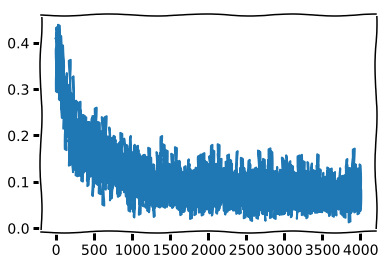

In [11]:
import random

history_loss = list()
for _ in range(iterations):
    inputdata = list()
    output_data = list()
    for _ in range(batch_size):
        input_output_pairs = random.choice(mydata)
        inputdata.append(input_output_pairs[0])
        output_one_hot = [0.0,0.0,0.0]
        output_one_hot[input_output_pairs[1]] = 1.0
        output_data.append(output_one_hot)

    res_optimizer, res_cost = sess.run([optimizer, cost], feed_dict={ipph: inputdata, lpph: output_data})
    print(res_cost)
    history_loss.append(res_cost)

with plt.xkcd():
    plt.plot(history_loss)
        

In [12]:
logit_y_test = list()
for label in logit_y_test: 
    toadd = [0.0,0.0,0.0]
    toadd[label] = 1.0
    logit_y_test.append(toadd)
res_cost, predicted = sess.run([cost, output_layer], feed_dict={ipph: scaled_data_test, lpph: logit_y_test})

ValueError: Cannot feed value of shape (0,) for Tensor 'labels_placeholder:0', which has shape '(?, 3)'

In [ ]:
correct_predictions = 0
for i in range(len(scaled_data)):
    predicted_by_network = sess.run(output_layer, 
                                    feed_dict={ipph: [scaled_data[i]]})
    print("input: %s, expected: %s, predicted: %s " % (str(scaled_data[i]), str(iris.target[i]), str(predicted_by_network)))
    if np.argmax(predicted_by_network) == iris.target[i]:
        correct_predictions += 1

print("Correct_predictions: " + str(correct_predictions) + "/" + str(len(scaled_data)) + " Accuracy: " + str(correct_predictions/len(scaled_data)))